<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Exemplary-Preprocessing-Steps" data-toc-modified-id="Exemplary-Preprocessing-Steps-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Exemplary Preprocessing Steps</a></span></li><li><span><a href="#Concatenating-Sessions-and-Computing-Evoked-Signal-for-single-subject" data-toc-modified-id="Concatenating-Sessions-and-Computing-Evoked-Signal-for-single-subject-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Concatenating Sessions and Computing Evoked Signal for single subject</a></span></li></ul></li><li><span><a href="#Single-Subject-Overview" data-toc-modified-id="Single-Subject-Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single Subject Overview</a></span></li><li><span><a href="#Compute-Evoked-Signals-across-all-subjects" data-toc-modified-id="Compute-Evoked-Signals-across-all-subjects-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute Evoked Signals across all subjects</a></span></li></ul></div>

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy import signal
%matplotlib notebook
plt.style.use('seaborn-darkgrid')

In [196]:
from importlib import reload
preprocessing = reload(preprocessing)

In [90]:
CHANNELS = ["C3","CZ","C4"]
DATA = pd.read_csv("Data/20220904172437_GF21M-02.csv",skipfooter=2)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12308/1529614629.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  DATA = pd.read_csv("Data/20220904172437_GF21M-02.csv",skipfooter=2)


## Exemplary Preprocessing Steps

#### Subject GF21M

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:346: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file,skipfooter=2)
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i] = (data.loc[i-1]+data.loc[i+1])/2#
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat

<IPython.core.display.Javascript object>


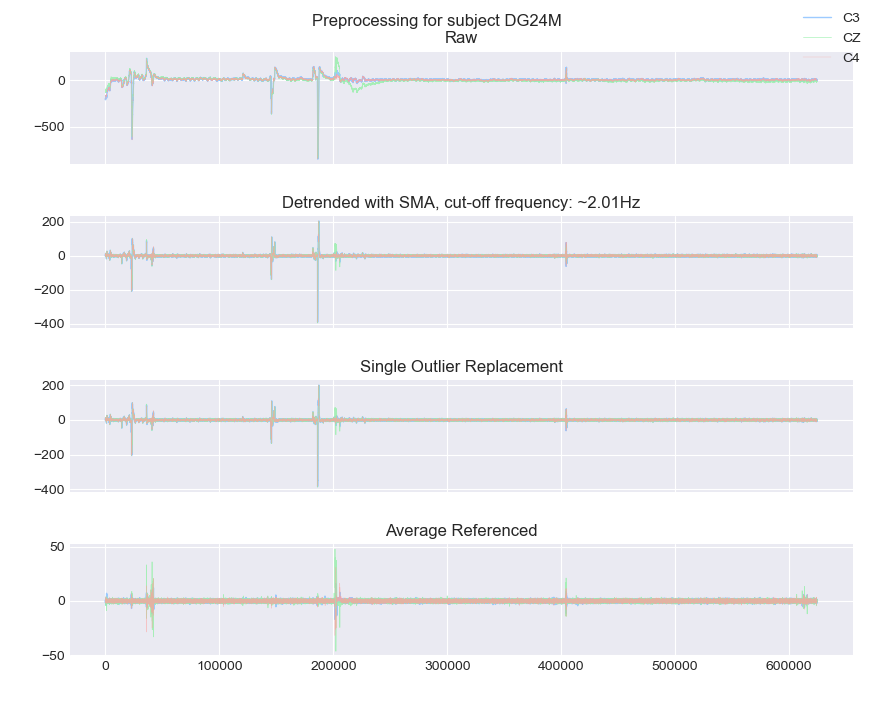

In [147]:
file = "Data/20220904170521_GF21M-01.csv"
preprocessing.plot_preprocessing_steps(file=file,save_plots=False)

<IPython.core.display.Javascript object>


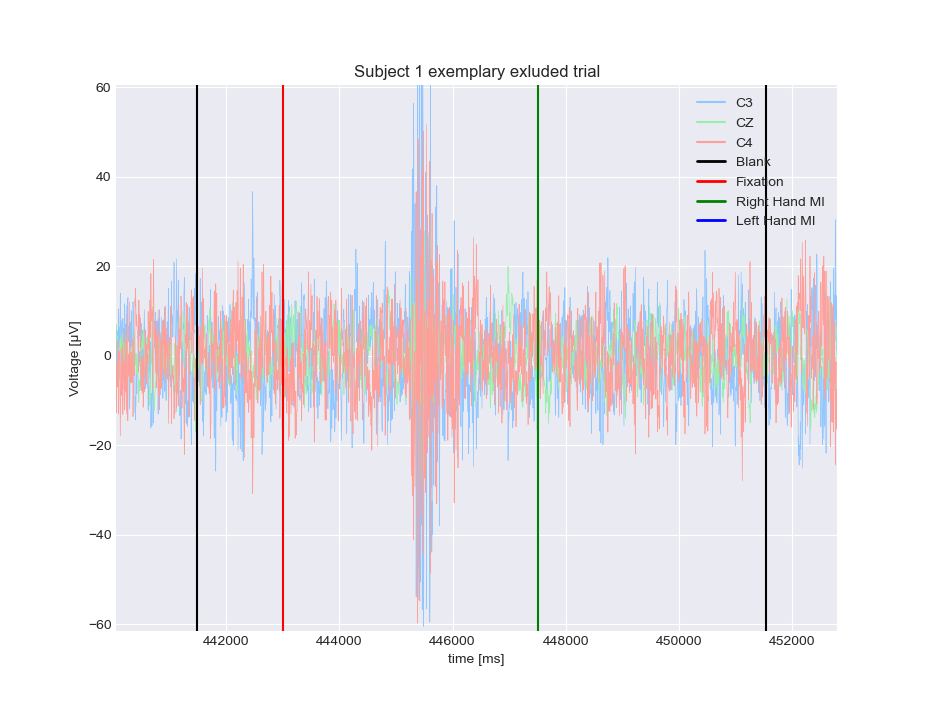

In [93]:
fig,ax = plt.subplots(1,1)
for ch in CHANNELS:
    ax.plot(avg_ref["sampling_time"],avg_ref[ch], label=ch,lw=0.5)
ax.set_title("Subject 1 exemplary exluded trial")
ax.set_ylabel("Voltage [μV]")
ax.set_xlabel("time [ms]")
show_stimuli(raw,ax)
plt.show()

## Concatenating Sessions and Computing Evoked Signal for single subject

### Code

In [66]:
import os
#subjects = [sn.split("_")[1].split("-")[0] for sn in os.listdir("Data/Preprocessed") if "csv" in sn]
subject=""
session_files = ["Data/"+session_name for session_name in os.listdir("Data/") if subject in session_name]
sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for session in session_files]

# Export preprocessed sessions to save time later
for i in range(len(sessions)):
    sessions[i].to_csv(f"Data/Preprocessed/{subject}_0{i}_pp.csv")
                 
full = pd.concat(sessions,ignore_index=True)
full.to_csv(f"Data/Concatenated/{subject}_full.csv")

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12308/1545888265.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for session in session_files]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12308/183748199.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i] = (data.loc[i-1]+data.loc[i+1])/2#
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_12308/1545888265.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  sessions = [preprocess(pd.read_csv(session,skipfooter=2))

### Results

DEBUG: Total number of Snippets:83
DEBUG: Number of excluded snippets: 7
DEBUG: Total number of Snippets:85
DEBUG: Number of excluded snippets: 5


<IPython.core.display.Javascript object>


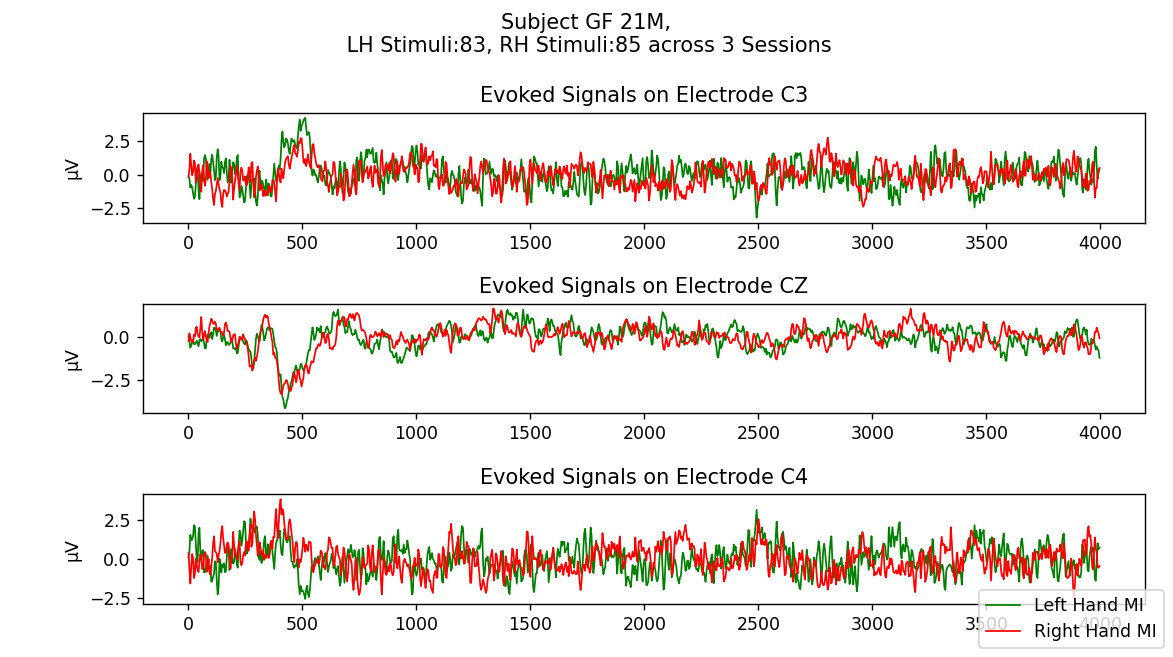

In [206]:
evoked = evoked_potentials(full)
n_lh = evoked["lh_info"]["n_used"]
n_rh = evoked["rh_info"]["n_used"]
plot_evoked(full,
            evoked_signals=[evoked["lh_evoked"],evoked["rh_evoked"]],
            fig_title=f"Subject GF 21M,\n LH Stimuli:{n_lh}, RH Stimuli:{n_rh} across 3 Sessions")
                

<IPython.core.display.Javascript object>


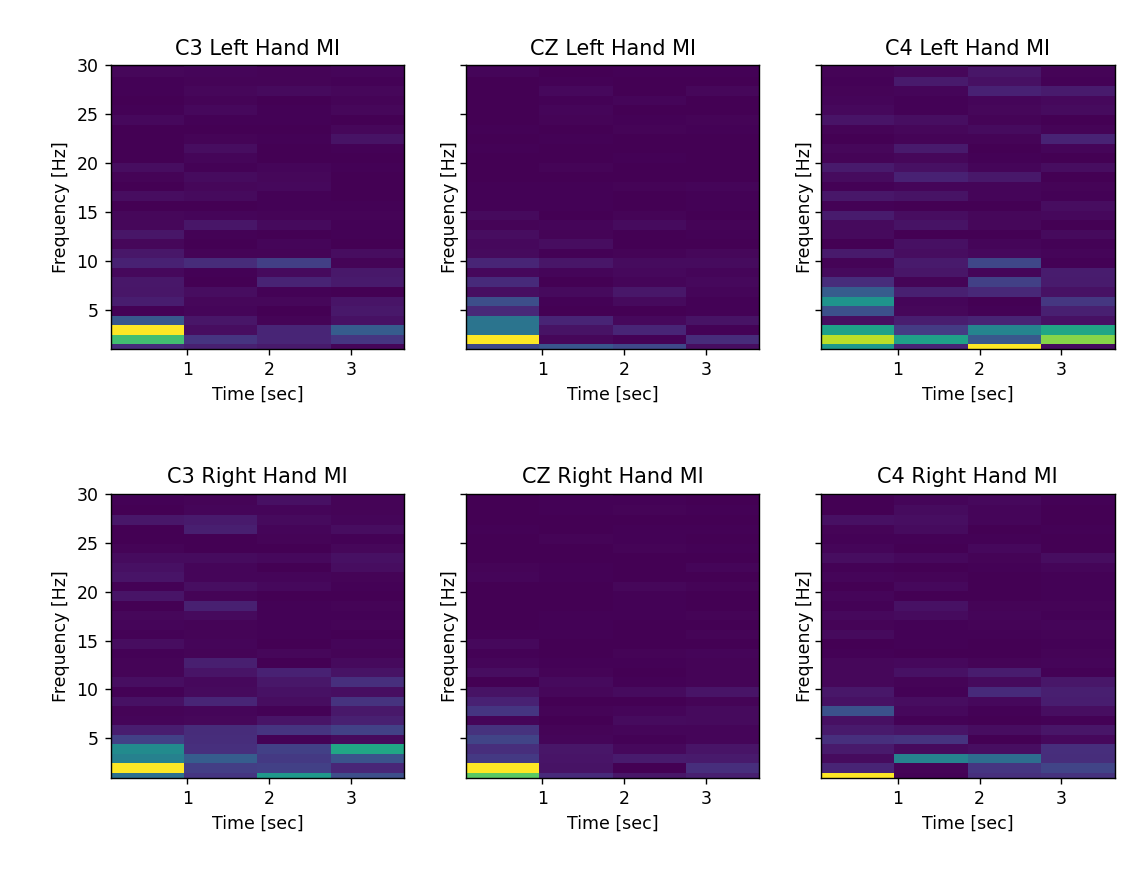

In [208]:
fig,axs = plt.subplots(2,3,sharey=True)
lh_evoked = evoked["lh_evoked"]
rh_evoked = evoked["rh_evoked"]

for i,ch in enumerate(CHANNELS):
    # Left Hand
    f, t, Sxx = signal.spectrogram(lh_evoked[ch], 250)
    axs[0,i].pcolormesh(t, f, Sxx, shading='nearest')
    axs[0,i].set_ylim(1,30)
    
    axs[0,i].set_ylabel('Frequency [Hz]')
    axs[0,i].set_xlabel('Time [sec]')
    axs[0,i].set_title(ch + " Left Hand MI")

    # Right Hand
    f, t, Sxx = signal.spectrogram(rh_evoked[ch], 250)
    axs[1,i].pcolormesh(t, f, Sxx, shading='nearest')
    axs[1,i].set_ylim(1,30)

    
    axs[1,i].set_ylabel('Frequency [Hz]')
    axs[1,i].set_xlabel('Time [sec]')
    axs[1,i].set_title(ch + " Right Hand MI")

plt.tight_layout()
plt.show()

In [123]:
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

<IPython.core.display.Javascript object>


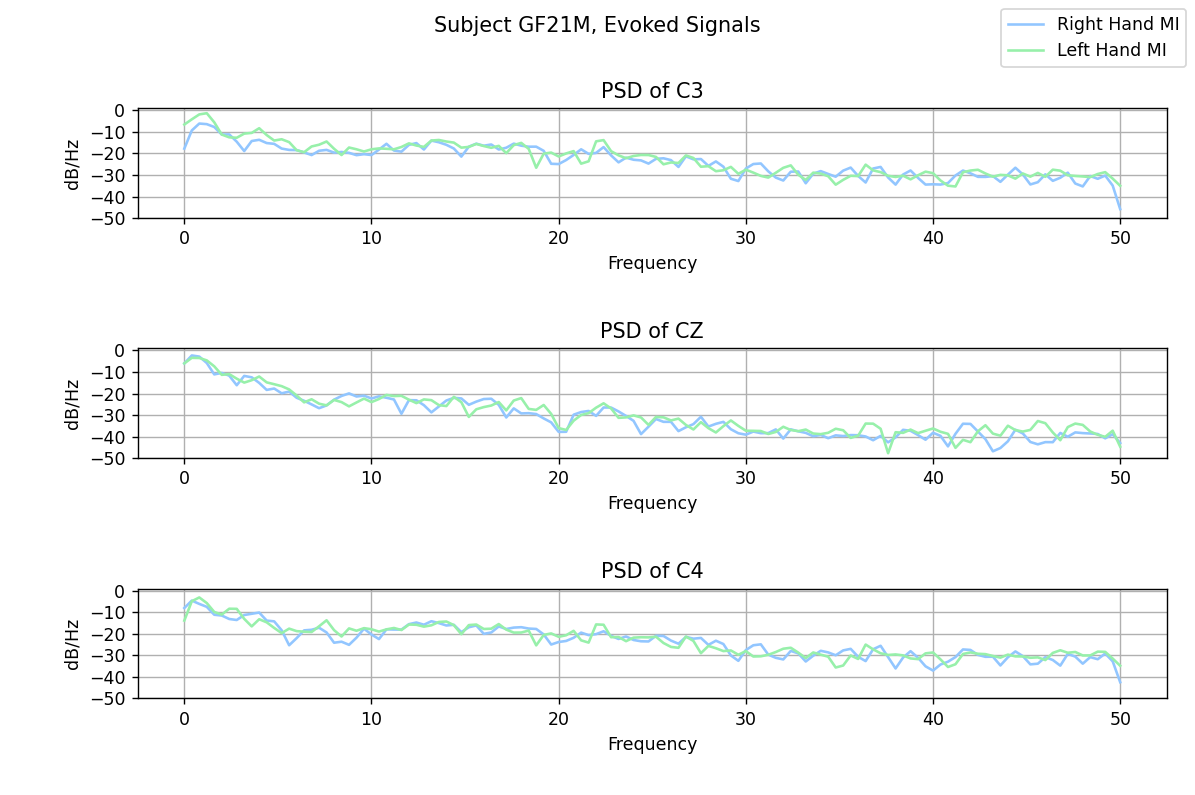

In [209]:
fig,axs = plt.subplots(3,1,sharey=True)

for i in range(len(axs)):
    ch = CHANNELS[i]
    axs[i].psd(rh_evoked[ch],250,100, label="Right Hand MI")
    axs[i].psd(lh_evoked[ch],250,100,label="Left Hand MI")
    axs[i].set_title(f"PSD of {ch}")
    axs[i].set_ylabel("dB/Hz")
    handles,labels = axs[i].get_legend_handles_labels()

fig.suptitle("Subject GF21M, Evoked Signals")
fig.legend(handles,labels,loc="upper right")
plt.tight_layout()
plt.show()

### Preprocess all data

In [248]:
import os
subjects = [sn.split("_")[1].split("-")[0] for sn in os.listdir("Data/") if "csv" in sn]
subjects = list(set(subjects))

for subject in subjects:
    session_files = ["Data/"+session_name for session_name in os.listdir("Data/") if subject in session_name]
    sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for session in session_files]
    # Export preprocessed sessions to save time later
    for i in range(len(sessions)):
        sessions[i].to_csv(f"Data/Preprocessed/{subject}_0{i}_pp.csv")

    full = pd.concat(sessions,ignore_index=True)
    full.to_csv(f"Data/Concatenated/{subject}_full.csv")

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_7084/200984369.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for session in session_files]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_7084/2401787352.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i] = (data.loc[i-1]+data.loc[i+1])/2#
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_7084/200984369.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_7084/200984369.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for session in session_files]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_7084/2401787352.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i] = (data.loc[i-1]+data.loc[i+1])/2#
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_7084/200984369.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  sessions = [preprocess(pd.read_csv(session,skipfooter=2)) for

# Compute Evoked Signals across all subjects

In [68]:
# Merge data from all trials and all subjects into one dataframe
pp_all = [pd.read_csv(sess_file) for sess_file in os.listdir("Data/Concatenated")]
pp_all = pd.concat(pp_all,ignore_index=True)

In [154]:
# calculate the evoked (actually event related potential) across all subjects
evoked = preprocessing.evoked_potentials(pp_all)

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

DEBUG: Total number of slices:777
DEBUG: Total number of slices:786


<IPython.core.display.Javascript object>


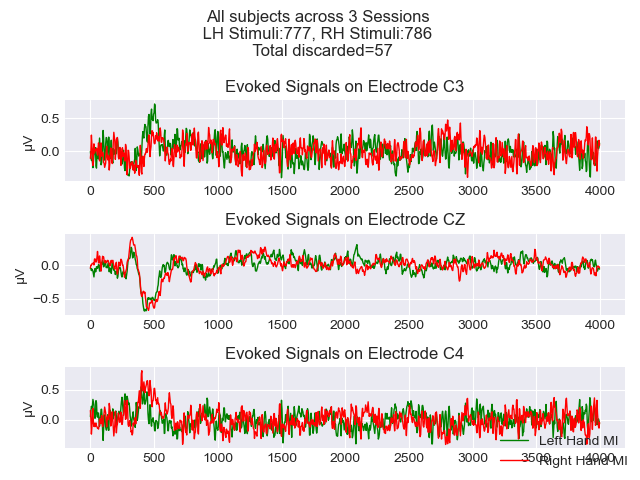

In [172]:
preprocessing.plot_evoked(evoked=evoked,subject="All subjects")

<IPython.core.display.Javascript object>


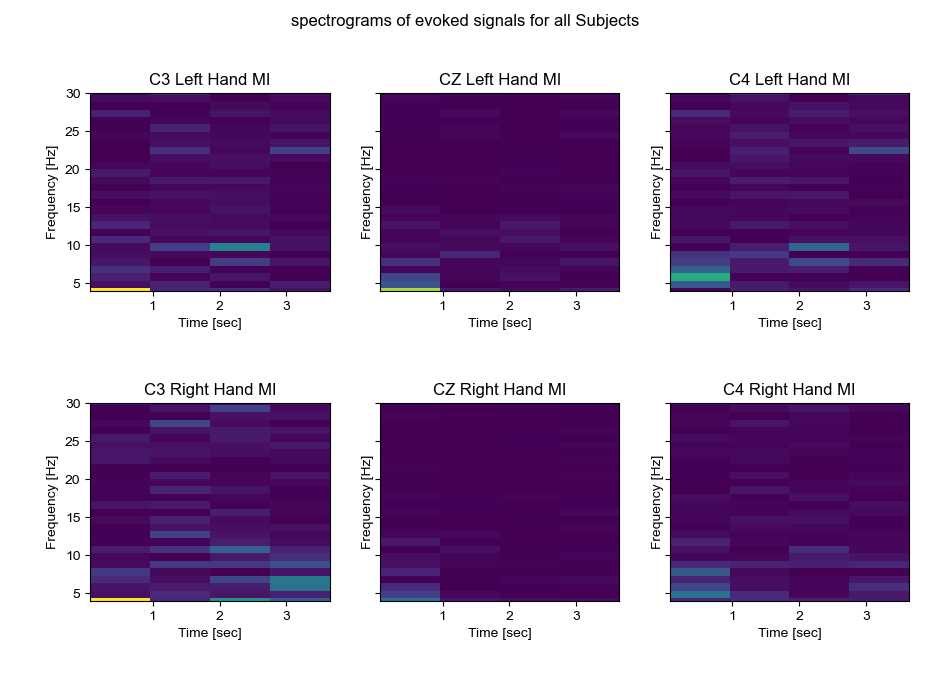

In [197]:
plt.style.use('default')
preprocessing.plot_spectrograms(evoked=evoked,subject="all Subjects")
plt.style.use('seaborn-darkgrid')

In [200]:
subject="NM31M"
df = pd.read_csv(f"Data/Concatenated/{subject}_full.csv")
evoked_subject = preprocessing.evoked_potentials(df)

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial["stimulus"][0] = stimulus
C:\Users\Host\Documents\Academia\Bachelors Thesis\Thesis\Code\midecoding\preprocessing.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

DEBUG: Total number of slices:76
DEBUG: Total number of slices:79


<IPython.core.display.Javascript object>


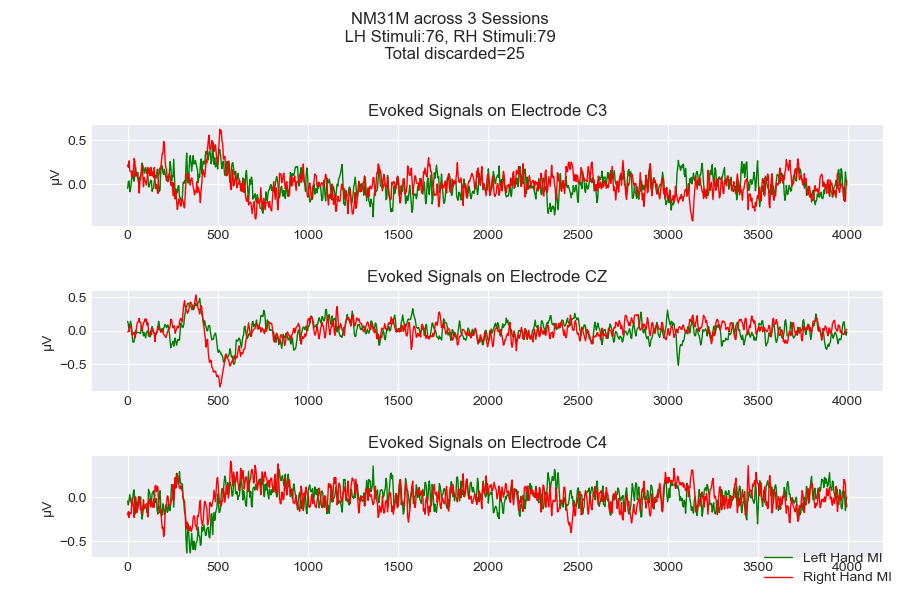

In [202]:
subject="NM31M"
preprocessing.plot_evoked(evoked=evoked_subject,subject=f"{subject}")

<IPython.core.display.Javascript object>


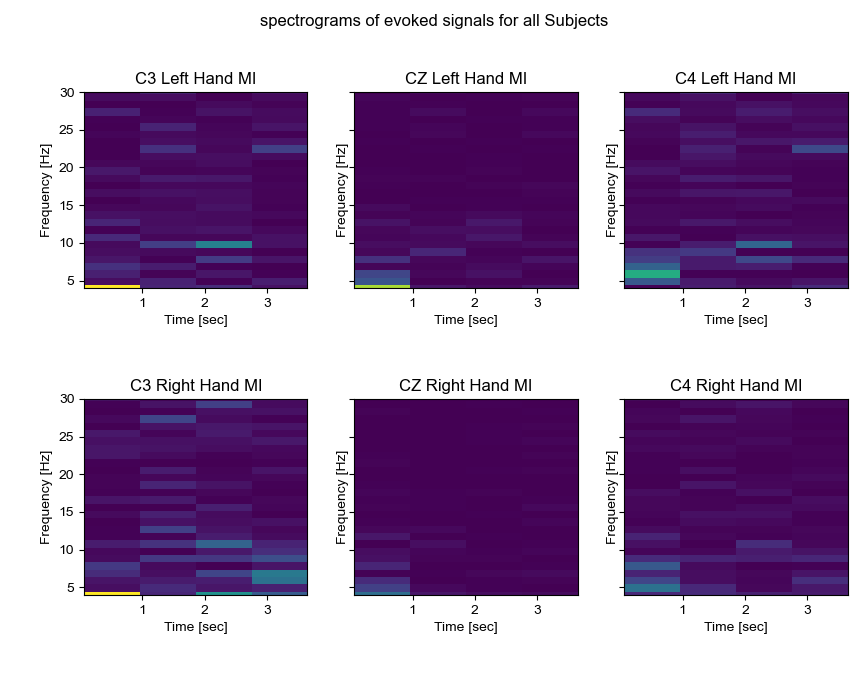

In [203]:
plt.style.use('default')
preprocessing.plot_spectrograms(evoked=evoked,subject="all Subjects")
plt.style.use('seaborn-darkgrid')